# Pre-processing


In [1]:
!pip install joblib

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imshow_collection
from PIL import Image
import cv2
import os
from os import listdir
import tensorflow as tf
import keras
from keras.datasets import mnist
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import glob 
import imutils
import skimage
from skimage import data
from skimage import filters
from skimage.segmentation import slic, mark_boundaries
from skimage.color import rgb2gray
from skimage import io 
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import *
from pylab import *
import pathlib
import pytesseract

#Importing Models
from signver.detector import Detector
from signver.cleaner import Cleaner
from signver.extractor import MetricExtractor
from signver.matcher import Matcher
from signver.utils import data_utils, visualization_utils
from signver.utils.data_utils import invert_img, resnet_preprocess
from signver.utils.visualization_utils import plot_np_array, visualize_boxes, get_image_crops, make_square


2022-04-25 23:51:19.147626: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mehdi/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-04-25 23:51:19.148017: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Importing Data

In [3]:
#Setting Directory
currentWorkingDir = os.path.dirname(os.getcwd())
print(currentWorkingDir)
currentWorkingDir = os.path.join(currentWorkingDir, "PI/Dataset/300")
print(currentWorkingDir)
for dirname, _, filenames in os.walk(currentWorkingDir):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/mehdi/Bureau
/home/mehdi/Bureau/PI/Dataset/300
/home/mehdi/Bureau/PI/Dataset/300/Cheque 120611.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309094.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309099.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309112.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309142.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309084.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309155.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309105.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 083659.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 100831.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309066.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 100829.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309136.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309127.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309080.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309133.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 083655.tif
/home/mehdi/Bureau/PI/Dataset/300/Cheque 309090.tif
/home/mehdi

In [4]:
dataset_path = currentWorkingDir
checks_path = os.path.join(dataset_path,'*')
checks_path = glob.glob(checks_path)
print(checks_path)

['/home/mehdi/Bureau/PI/Dataset/300/Cheque 120611.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309094.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309099.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309112.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309142.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309084.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309155.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309105.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 083659.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 100831.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309066.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 100829.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309136.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309127.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309080.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309133.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 083655.tif', '/home/mehdi/Bureau/PI/Dataset/300/Cheque 309090.tif', '/home/me

In [5]:
print(len(checks_path))
initial_count = 0
for path in pathlib.Path(dirname).iterdir():
    if path.is_file():
        initial_count += 1
print(initial_count)

112
112


# Cheque Visualisation

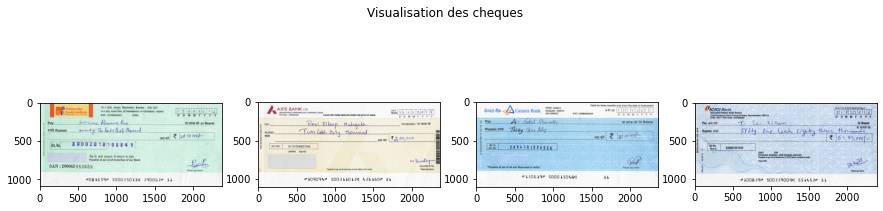

In [6]:
image_from_list = []
image_from_list.append(io.imread(checks_path[8]))   
image_from_list.append(io.imread(checks_path[1]))  
image_from_list.append(io.imread(checks_path[77]))
image_from_list.append(io.imread(checks_path[11]))
i, (im1,im2,im3,im4) = plt.subplots(1,4)
i.suptitle("Visualisation des cheques")
i.set_figwidth(15)
im1.imshow(image_from_list[0])
im2.imshow(image_from_list[1])
im3.imshow(image_from_list[2])
im4.imshow(image_from_list[3])

# RGB Plot for cheque

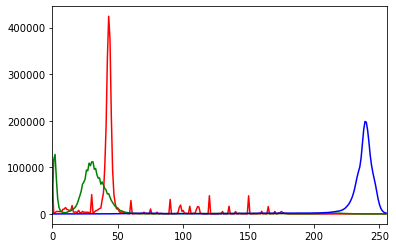

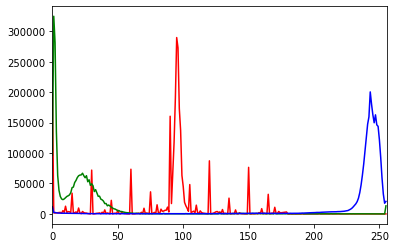

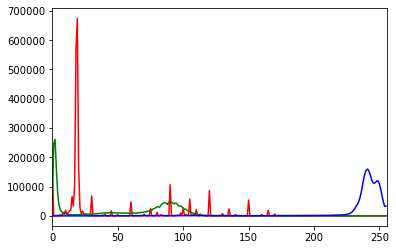

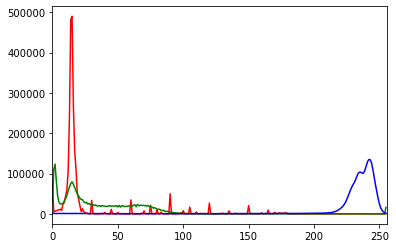

In [7]:
for j in range(0,len(image_from_list)):    
    hsv = cv2.cvtColor(image_from_list[j], cv2.COLOR_BGR2HSV)
    color = ('r','g','b')
    labels = ('h','s','v')
    for i,col in enumerate(color):
        hist = cv2.calcHist([hsv],[i],None,[256],[0,256])
        plt.plot(hist,color = col,label=labels[i])
        plt.xlim([0,256])
    plt.show()

# Import Random Cheque

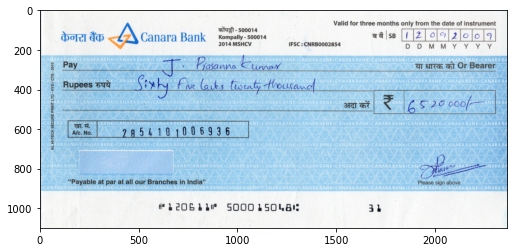

In [8]:
import random
randomi = random.randint(0,112)
image = io.imread(checks_path[randomi])  
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

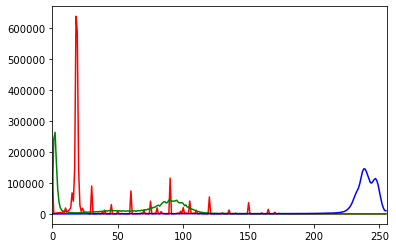

In [9]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
color = ('r','g','b')
labels = ('h','s','v')
for i,col in enumerate(color):
    hist = cv2.calcHist([hsv],[i],None,[256],[0,256])
    plt.plot(hist,color = col,label=labels[i])
    plt.xlim([0,256])
plt.show()

## Data Pre-processing ##

### Noise Reduce

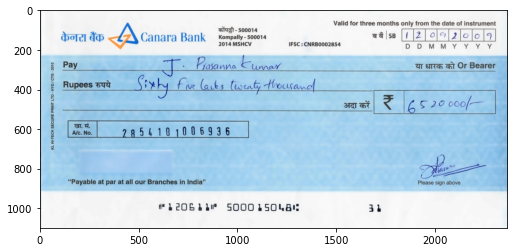

In [10]:
#Noise Reduce
from skimage.filters import gaussian

image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
cv2.imwrite('PreprocessingFinal/image_black_nonoise2.png', image)
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

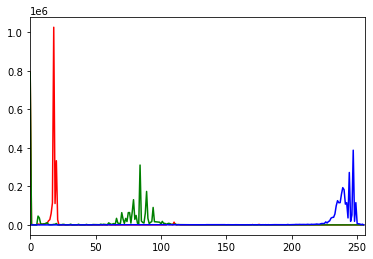

In [11]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
color = ('r','g','b')
labels = ('h','s','v')
for i,col in enumerate(color):
    hist = cv2.calcHist([hsv],[i],None,[256],[0,256])
    plt.plot(hist,color = col,label=labels[i])
    plt.xlim([0,256])
plt.show()

## RGB Channels

Text(0.5, 0.98, 'Original & RGB image channels')

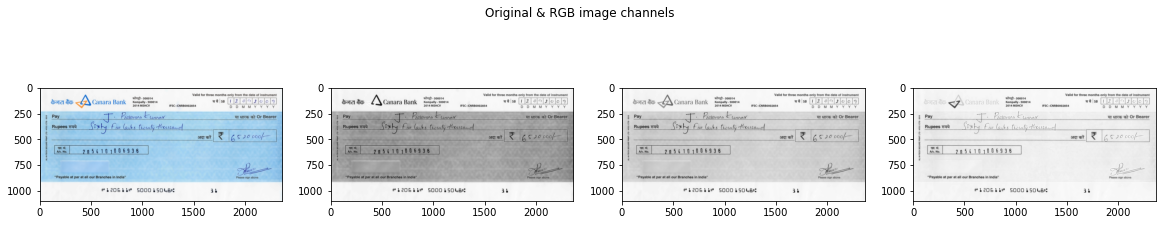

In [12]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4)
i.set_figwidth(20) 
im1.imshow(image)  #Original image
im2.imshow(cv2.cvtColor(image[:, : , 0], cv2.COLOR_BGR2RGB)) #Red
im3.imshow(cv2.cvtColor(image[:, : , 1], cv2.COLOR_BGR2RGB)) #Green
im4.imshow(cv2.cvtColor(image[:, : , 2], cv2.COLOR_BGR2RGB)) #Blue
i.suptitle('Original & RGB image channels')

#### According to our RGB plots, we noticed that the degree of pixels of green is giving a better output compared with degree of red and blue

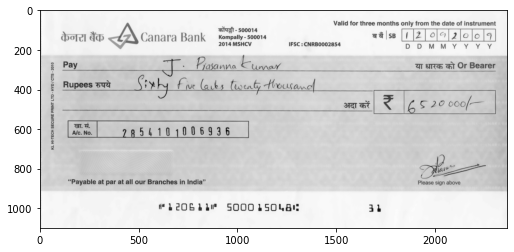

In [13]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
gr_image = cv2.cvtColor(image[:, : , 1], cv2.COLOR_BGR2RGB)
imshow(gr_image)

## Gray Scale


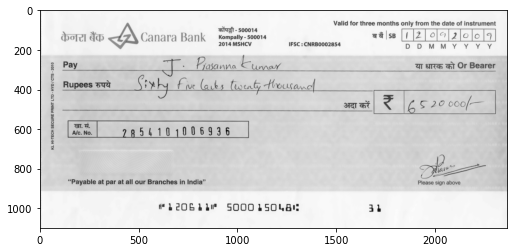

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('PreprocessingFinal/image_grayscale.png', gray_image)

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))

## Closing (From Erosing followed by Dilation)


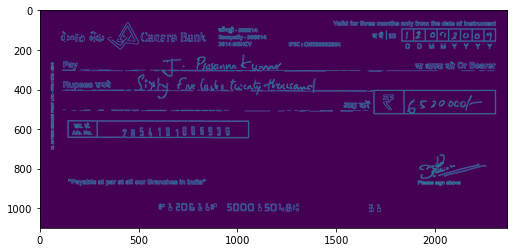

In [15]:
canny_image = cv2.Canny(gray_image,150,200)
cv2.imwrite('PreprocessingFinal/image_canny.png', canny_image)

i, (im1) = plt.subplots(1)
i.set_figwidth(25)
canny_image = cv2.Canny(gray_image,250,300)
imshow(canny_image)

### Erosion and Dilation 


True

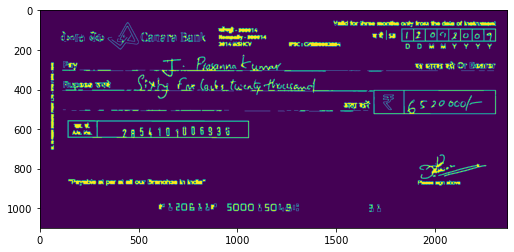

In [16]:
#Erosion and Dilation 
i, (im1) = plt.subplots(1)
i.set_figwidth(45)
kernel = np.ones((5,5),np.uint8)
dilate_image = cv2.dilate(canny_image,kernel, iterations=1)
erode_image = cv2.erode(dilate_image,kernel, iterations=1)
imshow(erode_image)
cv2.imwrite('PreprocessingFinal/erode.png', erode_image)
cv2.imwrite('PreprocessingFinal/dilate.png', dilate_image)

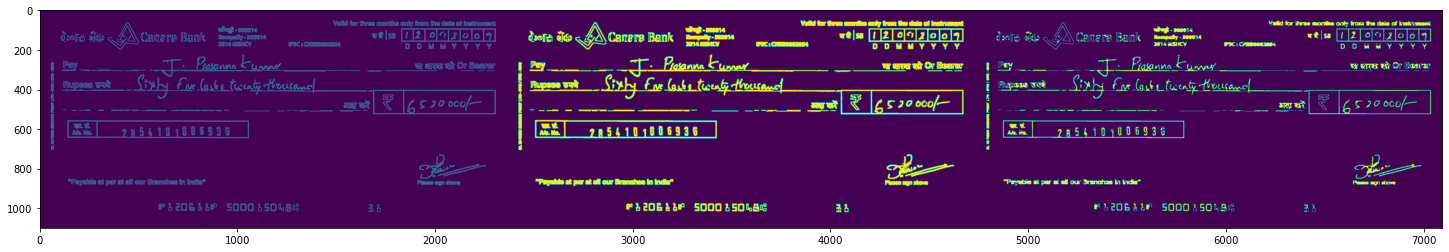

In [17]:
i, (im1) = plt.subplots(1)
i.set_figwidth(45)
display = np.hstack((canny_image,dilate_image,erode_image))
imshow(display)

## Black and White Conversion


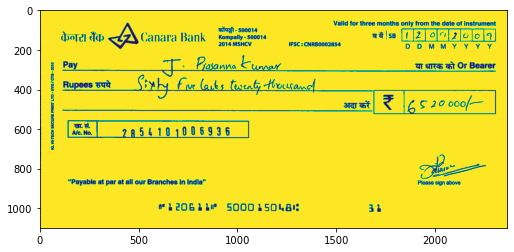

In [18]:
# convert image to black and white
thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
# store output images
cv2.imwrite('PreprocessingFinal/image_black.png', image_black)

i, (im1) = plt.subplots(1)
i.set_figwidth(45)
imshow(image_black)

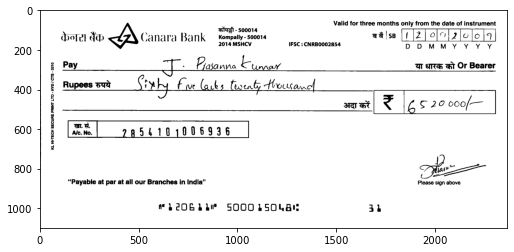

In [19]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(cv2.cvtColor(image_black, cv2.COLOR_BGR2RGB))

## Normalisation


In [20]:
#normalization
#norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))
#i, (im1) = plt.subplots(1)
#i.set_figwidth(15)
#print(norm_image)
#im1.imshow(norm_image)

## Noise Remove

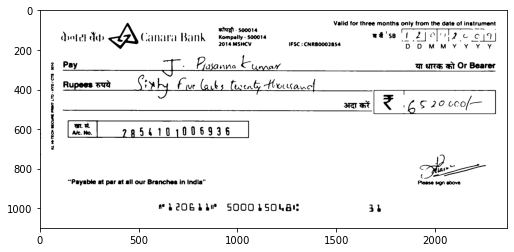

In [21]:
def remove_noise(image):
    return cv2.medianBlur(image,5)

nv_image=remove_noise(image_black)
cv2.imwrite('PreprocessingFinal/image_black_nonoise.png', nv_image)

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(cv2.cvtColor(nv_image, cv2.COLOR_BGR2RGB))

### Erode

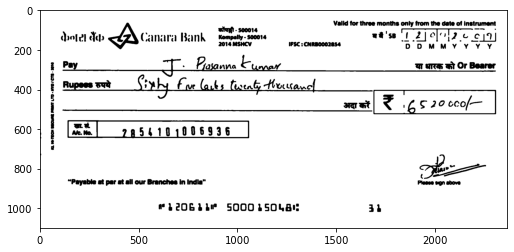

In [22]:
def erode(image):
    kernel = np.ones((3,3),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

cv2.imwrite('PreprocessingFinal/erode.png', erode(nv_image))

i, (im1) = plt.subplots(1)
i.set_figwidth(15)
imshow(erode(cv2.cvtColor(nv_image, cv2.COLOR_BGR2RGB)))

## Open (Dilation followed by Erosion)

In [23]:
# close all windows to cleanup the screen, then initialize a list of
# of kernels sizes that will be applied to the image
kernelSizes = [(3, 3), (5, 5), (7, 7)]
# loop over the kernels sizes
i=0
for kernelSize in kernelSizes:
    i = i+1
# construct a rectangular kernel from the current size and then
# apply an "opening" operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(canny_image, cv2.MORPH_OPEN, kernel)
    cv2.imwrite("PreprocessingFinal/open"+str(i)+".png",opening)

## Images characteristics 

In [24]:
ex1=image.size

ex2=nv_image.size

ex3 = image_black.size

feature1 = pd.Series([ex1], index=['Nb pixels'])
feature2 = pd.Series([ex2], index=['Nb pixels'])
feature3 = pd.Series([ex3], index=['Nb pixels'])

ImgFeatures = pd.DataFrame({'Original': feature1, 'N&B': feature2 , 'Black': feature2})
ImgFeatures# Variance

#La variance permet de décrire comment les niveaux de gris de l’image sont répartis autour de la moyenne.
v1=np.var(image, axis=(-1, -2))
print(v1)

v2=np.var(gray_image, axis=(-1, -2))
print(v2)

v3=np.var(image_black, axis=(-1, -2))
print(v3)
#valeur tres grande indique qu'il y a un contraste 
#Ecart type: L'écart type est une mesure de la façon dont les niveaux de gris dans l’image sont répartis.
st1=np.std(image)
print(st1)

st2=np.std(gray_image)
print(st2)

st3=np.std(image_black)
print(st3)
#les niveaux de gris sont dispersés

[4.73586705 4.74825673 5.20275718 ... 4.64040136 4.54967215 4.52578937]
1061.4470931511535
3267.702861613612
42.72572362228946
32.57985716898025
57.16382476368785


# Variance

In [25]:
#La variance permet de décrire comment les niveaux de gris de l’image sont répartis autour de la moyenne.
v1=np.var(image, axis=(-1, -2))
print(v1)

v2=np.var(gray_image, axis=(-1, -2))
print(v2)

v3=np.var(image_black, axis=(-1, -2))
print(v3)
#valeur tres grande indique qu'il y a un contraste 
#Ecart type: L'écart type est une mesure de la façon dont les niveaux de gris dans l’image sont répartis.
st1=np.std(image)
print(st1)

st2=np.std(gray_image)
print(st2)

st3=np.std(image_black)
print(st3)
#les niveaux de gris sont dispersés

[4.73586705 4.74825673 5.20275718 ... 4.64040136 4.54967215 4.52578937]
1061.4470931511535
3267.702861613612
42.72572362228946
32.57985716898025
57.16382476368785


In [26]:
feature1 = pd.Series([v1,v2,v3], index=['cheque_RGB','cheque_grayscale','cheque_black&white'])
feature2 = pd.Series([st1,st2,st3], index=['cheque_RGB','cheque_grayscale','cheque_black&white'])

ImgFeatures = pd.DataFrame({'Variance': feature1, 'std': feature2})
ImgFeatures

Variance  \
cheque_RGB          [4.735867053444122, 4.748256725274277, 5.20275...   
cheque_grayscale                                          1061.447093   
cheque_black&white                                        3267.702862   

                          std  
cheque_RGB          42.725724  
cheque_grayscale    32.579857  
cheque_black&white  57.163825

In [27]:
# opening a  image 
im = Image.open('PreprocessingFinal/image_black.png')
  
# getting colors 
# multiband images (RBG) 
im1 = Image.Image.getcolors(im) 
  
print(im1) 

#Notre image contient 182905 pixels en noir (0) et 2418595 pixels en blanc (255)

[(138060, 0), (2463440, 255)]


## Segmentaion ##

Text(0.5, 0.98, 'Original & Seuillage binaire sur les canals')

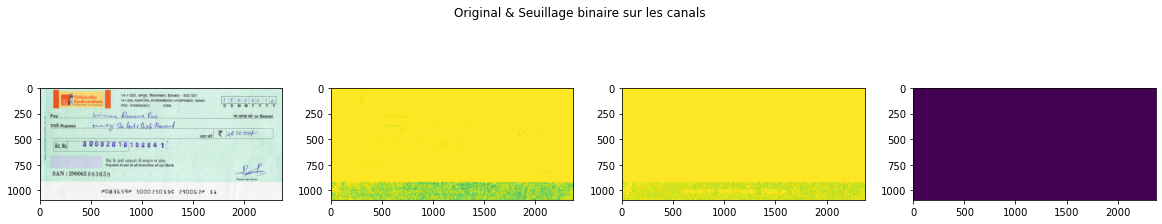

In [28]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4)
i.set_figwidth(20) 



hsv = cv2.cvtColor(image_from_list[0], cv2.COLOR_BGR2HSV)
h,s,v= cv2.split(hsv)
ret_h, th_h = cv2.threshold(h,0,255,cv2.THRESH_BINARY)
ret_s, th_s = cv2.threshold(s,0,255,cv2.THRESH_BINARY)
ret_v, th_v = cv2.threshold(v,0,255,cv2.THRESH_BINARY)

im1.imshow(image_from_list[0])  #Original image
im2.imshow(th_h)  #Seuillage automatique sur le canal hue
im3.imshow(th_s)  #Seuillage automatique sur le canal Saturation
im4.imshow(th_v)  #Seuillage automatique sur le canal Luminosité
i.suptitle('Original & Seuillage binaire sur les canals')

Text(0.5, 0.98, 'Original & Seuillage d OTSU automatique sur les canals')

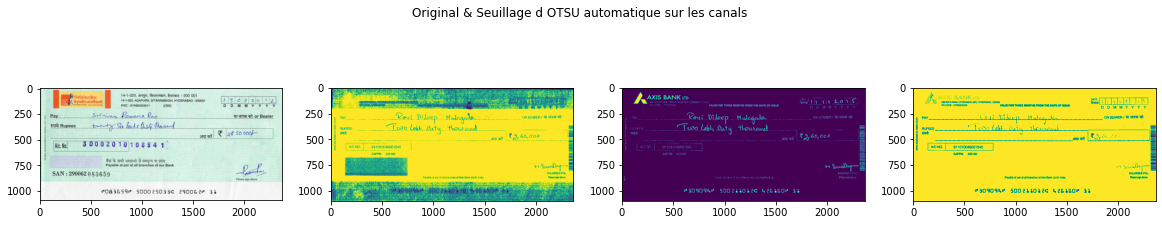

In [29]:
i, (im1, im2, im3, im4) = plt.subplots(1, 4)
i.set_figwidth(20) 



hsv = cv2.cvtColor(image_from_list[1], cv2.COLOR_BGR2HSV)
h,s,v= cv2.split(hsv)
ret_h, th_h = cv2.threshold(h,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_s, th_s = cv2.threshold(s,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
ret_v, th_v = cv2.threshold(v,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

im1.imshow(image_from_list[0])  #Original image
im2.imshow(th_h)  #Seuillage automatique sur le canal hue
im3.imshow(th_s)  #Seuillage automatique sur le canal Saturation
im4.imshow(th_v)  #Seuillage automatique sur le canal Luminosité

cv2.imwrite("PreprocessingFinal/HSV.png",hsv)
cv2.imwrite("PreprocessingFinal/threshS.png",th_s)
cv2.imwrite("PreprocessingFinal/threshH.png",th_h)
cv2.imwrite("PreprocessingFinal/threshV.png",th_v)
i.suptitle('Original & Seuillage d OTSU automatique sur les canals')

In [30]:
kernelSizes = [(2, 2), (5, 5), (7, 7)]
# loop over the kernels sizes
i=0
for kernelSize in kernelSizes:
    i = i+1
# construct a rectangular kernel from the current size and then
# apply an "opening" operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, kernelSize)
    opening = cv2.morphologyEx(th_s, cv2.MORPH_OPEN, kernel)
    cv2.imwrite("PreprocessingFinal/open"+str(i)+".png",opening)

In [31]:
imageTest = cv2.imread(currentWorkingDir+"/Cheque 309090.tif")
openTest = cv2.imread("PreprocessingFinal/open1.png")

True

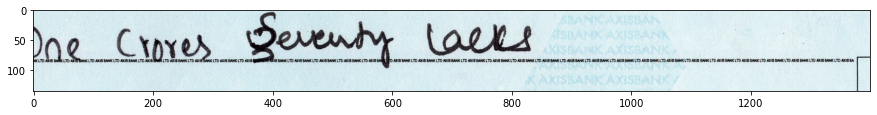

In [32]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
y=320
x=320
h=135
w=1400
def ExtractAmount(openTest,x,y,w,h):
    return (openTest[y:y+h, x:x+w])
legal_amount = ExtractAmount(imageTest,x,y,w,h)
imshow(legal_amount)
cv2.imwrite('PreprocessingFinal/legal_amount.png', legal_amount)

In [33]:
def delete_lines(image):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray,30,10,apertureSize = 3)
    lines = cv2.HoughLines(edges,1,np.pi/270,50)
    for rho,theta in lines[0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1600*(-b))
        y1 = int(y0 + 1600*(a))
        x2 = int(x0 - 1600*(-b))
        y2 = int(y0 - 1600*(a))
        cv2.line(image,(x1,y1),(x2,y2),(255, 255, 255),7)
    return image

In [34]:
def seg(image):
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #Threshold Image
    ret,thresh = cv2.threshold(image,170,255,cv2.THRESH_BINARY_INV)
    #Image Dilation
    kernel = np.ones((5,5), np.uint8)
    img_dilation = cv2.dilate(thresh, kernel, iterations=4)
    #Segmentation Part
    ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    #image_sign = image[200:340, :]
    #cv2.imwrite(testWorkingDir+"segmentationTest/signatures/"+filename[33:], image_sign)
    #image_amount = image[143:200,:]
    #cv2.imwrite(testWorkingDir+"segmentationTest/amount"+filename[33:], image_amount)
    #for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
    #    x, y, w, h = cv2.boundingRect(ctr)
        # Getting ROI
    #    roi = image[y:y+h, x:x+w]
        # show ROI
    #    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
        #if(x == 682 and y==25):
        #    cv2.imwrite("segment_no_"+str(i)+".png",roi)
    #Writing Final Image
    return(image)

In [35]:
for i in range(0,len(checks_path)):
    image = cv2.imread(checks_path[i])
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
    nv_image=remove_noise(image_black)
    img = ExtractAmount(nv_image,x,y,w,h)
    img = erode(img)
    #img = cv2.imread(amounts_path[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(img, 5)
    adapt_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    thresh_type = cv2.THRESH_BINARY_INV
    bin_img = cv2.adaptiveThreshold(blur, 255, adapt_type, thresh_type, 11, 2)
    rho, theta, thresh = 2, np.pi/180, 400
    lines = cv2.HoughLines(bin_img, rho, theta, thresh)
    if lines is None:
        cv2.imwrite('PreprocessingFinal/black_and_white/'+checks_path[i][-17:]+'.png',seg(img))
    elif lines[0][0][0] > 125.0 or lines[0][0][0] < 20.0:
        for rho,theta in lines[1]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)
    else:
        for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)  
    cv2.imwrite('PreprocessingFinal/black_and_white/'+checks_path[i][-17:]+'.png',seg(img))    

# Signature Segmentation

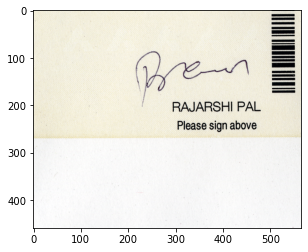

In [36]:
import random
randomi = random.randint(0,112)
image = io.imread(checks_path[randomi]) 
image = image[620:1900,1800:]
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [37]:
for i in range(0,len(checks_path)):
    image = cv2.imread(checks_path[i])
    cv2.imwrite('PreprocessingFinal/signatures/'+checks_path[i][-17:]+'.png',image[620:1900,1800:])    

In [38]:
import numpy as np
import skimage.io
import skimage.restoration
import skimage.exposure

#img = skimage.io.imread('/home/mehdi/Bureau/PI/test.png')
#msk = skimage.io.imread('/home/mehdi/Bureau/PI/mask.png')
#msk = skimage.exposure.rescale_intensity(msk, in_range='image', out_range=(0,1))
#newimg = skimage.restoration.inpaint_biharmonic(img, msk, multichannel=True)
#skimage.io.imsave('/home/mehdi/Bureau/PI/kitty_inpaint_biharmonic.png', newimg)

## Instantiate the Detector, Extractor Modules

In [39]:
detector_model_path = "models/detector/small"
detector = Detector()
detector.load(detector_model_path)

2022-03-31 11:04:31.714247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mehdi/anaconda3/lib/python3.7/site-packages/cv2/../../lib64:
2022-03-31 11:04:31.714293: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-31 11:04:31.714313: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mehdi-Lenovo-Y520-15IKBN): /proc/driver/nvidia/version does not exist
2022-03-31 11:04:31.715480: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
extractor_model_path = "models/extractor/metric"
extractor = MetricExtractor() 
extractor.load(extractor_model_path)

In [41]:
cleaner_model_path = "models/cleaner/small"
cleaner = Cleaner() 
cleaner.load(cleaner_model_path)

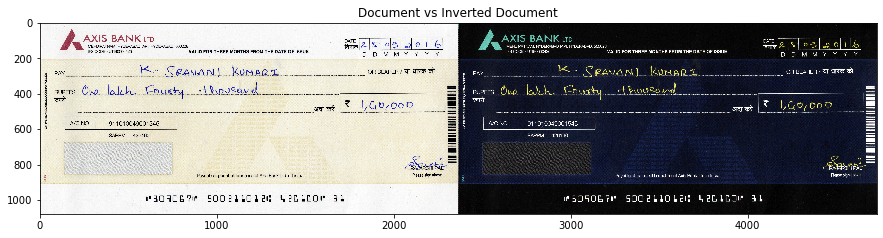

In [42]:
image_np = data_utils.img_to_np_array("/home/mehdi/Bureau/PI/Dataset/300/Cheque 309067.tif")
inverted_image_np = data_utils.img_to_np_array("/home/mehdi/Bureau/PI/Dataset/300/Cheque 309067.tif", invert_image=True)

img_tensor = tf.convert_to_tensor(inverted_image_np)
img_tensor = img_tensor[tf.newaxis, ...]
plot_np_array( np.concatenate((image_np, inverted_image_np), axis = 1), title="Document vs Inverted Document")


## Get Localization Predictions (Where are Signatures in the Image?)

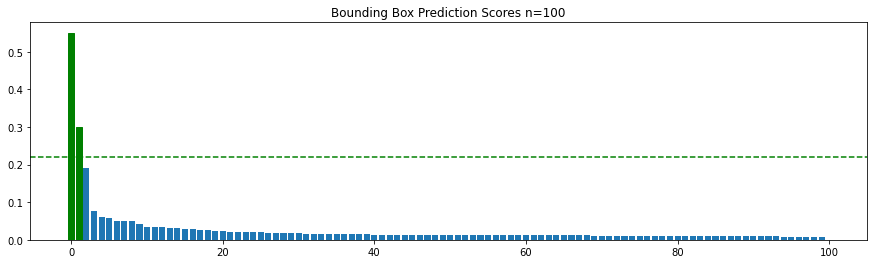

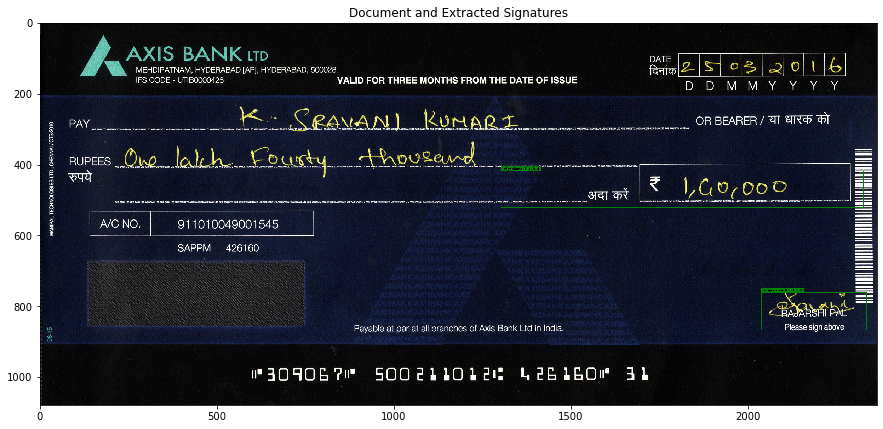

In [43]:
# get a list of bounding box predictions for image
boxes, scores, classes, detections = detector.detect(img_tensor)

# plot confidence scores for each detections
threshold = 0.22
plt.figure(figsize=(15,4))
barlist = plt.bar(range(len(scores)),scores);
[ x.set_color('g') for x in barlist if x.get_height() > threshold]
plt.axline((0, threshold), (100, threshold), color="g", linestyle="--");
plt.title("Bounding Box Prediction Scores n=" + str(len(scores)));

# annotate image with bounding boxes above a given threshold and plot 
annotated_image = visualize_boxes(inverted_image_np, boxes, scores, threshold=threshold, color="green")
plot_np_array(annotated_image, title="Document and Extracted Signatures")  

/home/mehdi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


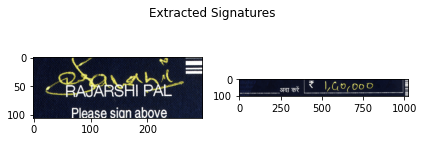

In [44]:
signatures = get_image_crops(inverted_image_np, boxes, scores,  threshold = 0.22)
img = np.array(signatures)
#cv2.imwrite("/home/farjo/Desktop/PI/image.png",np.array(signatures))
plot_np_array(signatures, fig_size=(12,14), ncols=4, title="Extracted Signatures")

## Extract Features from Signatures

/home/mehdi/Bureau/PI/signver/utils/data_utils.py:19: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (224, 224, 3) looks like an RGB image
  thresh = threshold_otsu(img_arr)


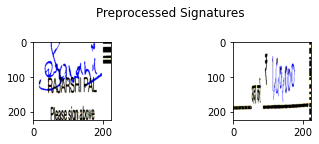

In [45]:
sigs= [ resnet_preprocess( x, resnet=False ) for x in signatures ]
plot_np_array(sigs,"Preprocessed Signatures") 

In [46]:
for i in range(0,len(checks_path)):
    # Import images
    test_line = data_utils.img_to_np_array(checks_path[i])
    test_line = data_utils.img_to_np_array(checks_path[i], invert_image=True)

    test_line = resnet_preprocess( test_line[650:1000,1650:], resnet=False , invert_input=True)  
    cn = cleaner.clean(np.expand_dims(test_line, axis=0))
    final_image =cn.astype(np.int64) *255
    norm_sigs =  final_image * (1./255)
    norm_sigs = norm_sigs.astype(np.int64) *255
    cv2.imwrite("/home/mehdi/Bureau/PI/PreprocessingFinal/signatures_preprocessing/cleaned_sign/"+checks_path[i][-17:]+".png",final_image.reshape(224,224,3))
    cv2.imwrite("/home/mehdi/Bureau/PI/PreprocessingFinal/signatures_preprocessing/detected_sign_image/"+checks_path[i][-17:]+".png",test_line)
    #cv2.imwrite("/home/mehdi/Desktop/SIgnature/cleaned_amount/image"+str(i)+".png",norm_sigs.reshape(224,224,3))

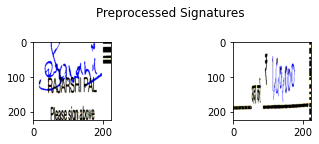

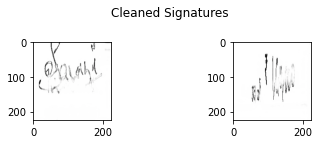

In [47]:
norm_sigs = [ x * (1./255) for x in sigs]
plot_np_array(norm_sigs,"Preprocessed Signatures")
cleaned_sigs = cleaner.clean(np.array(norm_sigs))
# cleaned_sigs = cleaner.clean(cleaned_sigs)
# cleaned_sigs = cleaner.clean(cleaned_sigs)
plot_np_array(list(cleaned_sigs),"Cleaned Signatures")

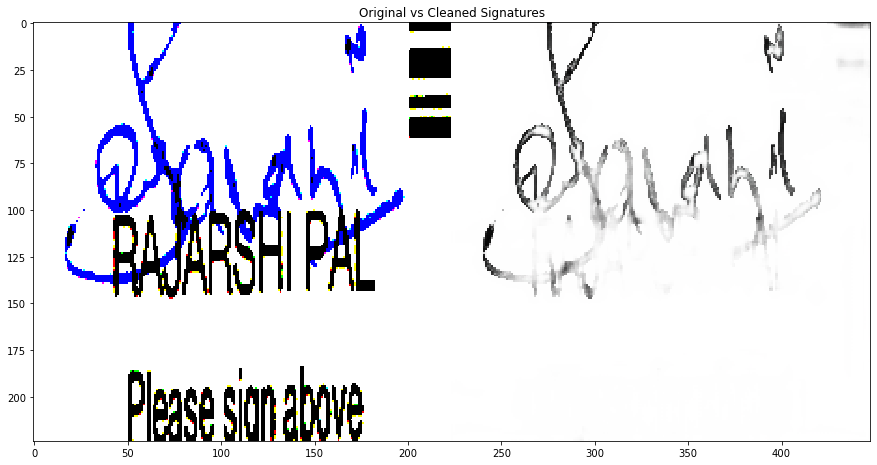

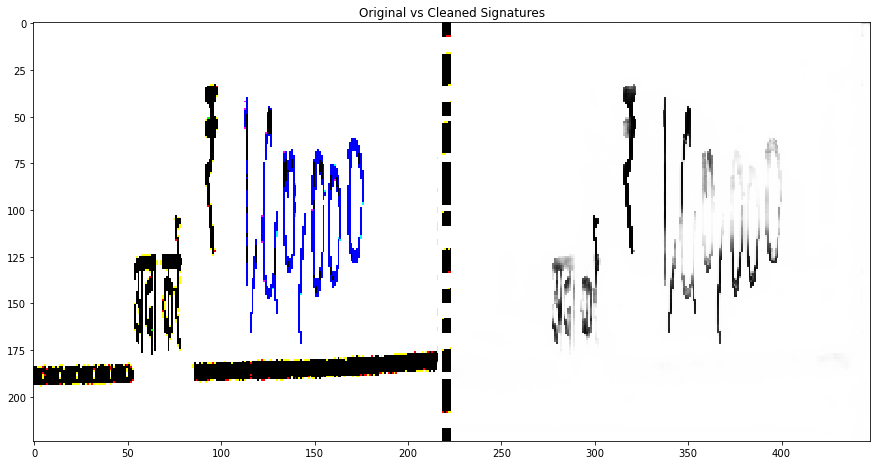

In [48]:
for i in range(len(cleaned_sigs)):
    plot_np_array(np.concatenate((norm_sigs[i], cleaned_sigs[i]) , axis=1), title="Original vs Cleaned Signatures") 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


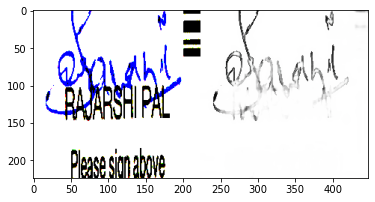

In [49]:
plt.imshow(np.concatenate((sigs[0], cleaned_sigs[0]) , axis=1))

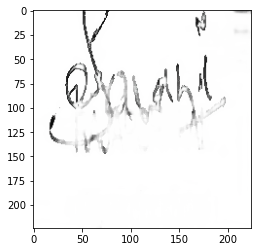

In [50]:
plt.imshow(cleaned_sigs[0])

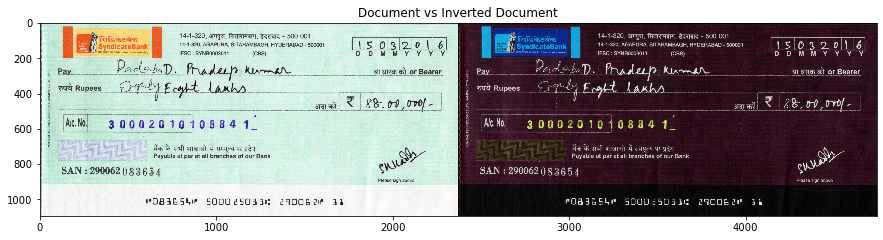

In [52]:
# Import images
image_np = data_utils.img_to_np_array("/home/mehdi/Bureau/PI/Dataset/300/Cheque 083654.tif")
inverted_image_np = data_utils.img_to_np_array('/home/mehdi/Bureau/PI/Dataset/300/Cheque 083654.tif', invert_image=True)
cv2.imwrite("/home/mehdi/Bureau/image.png",inverted_image_np)

img_tensor = tf.convert_to_tensor(inverted_image_np)
img_tensor = img_tensor[tf.newaxis, ...]
# Detect sign
boxes, scores, classes, detections = detector.detect(img_tensor)
threshold = 0.30
annotated_image = visualize_boxes(inverted_image_np, boxes, scores, threshold=threshold, color="green")
cv2.imwrite("home/mehdi/Bureau/image1.png",annotated_image)
plot_np_array( np.concatenate((image_np, inverted_image_np ), axis = 1), title="Document vs Inverted Document")

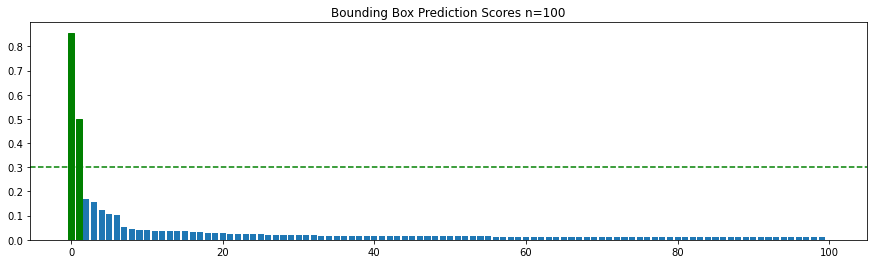

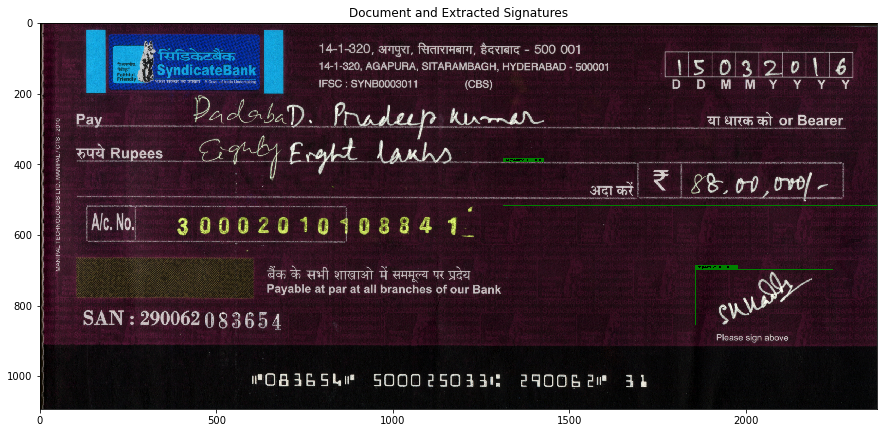

In [53]:
# get a list of bounding box predictions for image
boxes, scores, classes, detections = detector.detect(img_tensor)

# plot confidence scores for each detections
threshold = 0.30
plt.figure(figsize=(15,4))
barlist = plt.bar(range(len(scores)),scores);
[ x.set_color('g') for x in barlist if x.get_height() > threshold]
plt.axline((0, threshold), (100, threshold), color="g", linestyle="--");
plt.title("Bounding Box Prediction Scores n=" + str(len(scores)));

# annotate image with bounding boxes above a given threshold and plot 
annotated_image = visualize_boxes(inverted_image_np, boxes, scores, threshold=threshold, color="green")
plot_np_array(annotated_image, title="Document and Extracted Signatures")  

## Name Segmentation

True

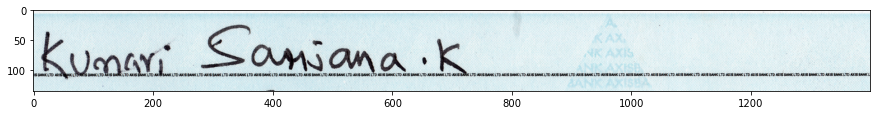

In [54]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
y=190
x=320
h=135
w=1400
legal_amount = ExtractAmount(imageTest,x,y,w,h)
imshow(legal_amount)
cv2.imwrite('PreprocessingFinal/legal_amount.png', legal_amount)

In [55]:
for i in range(0,len(checks_path)):
    image = cv2.imread(checks_path[i])
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
    nv_image=remove_noise(image_black)
    img = ExtractAmount(nv_image,x,y,w,h)
    img = erode(img)
    #img = cv2.imread(amounts_path[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(img, 5)
    adapt_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    thresh_type = cv2.THRESH_BINARY_INV
    bin_img = cv2.adaptiveThreshold(blur, 255, adapt_type, thresh_type, 11, 2)
    rho, theta, thresh = 2, np.pi/180, 400
    lines = cv2.HoughLines(bin_img, rho, theta, thresh)
    if lines is None:
        cv2.imwrite('PreprocessingFinal/name/'+checks_path[i][-17:]+'.png',seg(img))
    elif lines[0][0][0] > 125.0 or lines[0][0][0] < 20.0:
        for rho,theta in lines[1]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)
    else:
        for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)  
    cv2.imwrite('PreprocessingFinal/name/'+checks_path[i][-17:]+'.png',seg(img))    

## Amount Segmentation

True

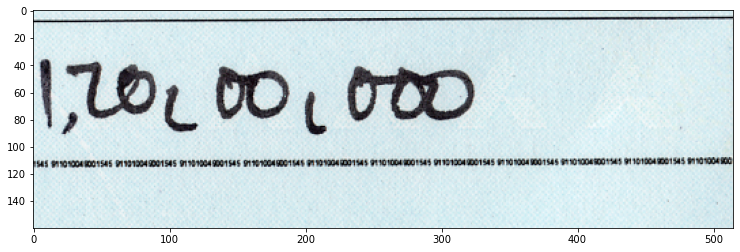

In [56]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
y=390
x=1780
h=160
w=515
legal_amount = ExtractAmount(imageTest,x,y,w,h)
imshow(legal_amount)
cv2.imwrite('PreprocessingFinal/legal_amount.png', legal_amount)

In [57]:
for i in range(0,len(checks_path)):
    image = cv2.imread(checks_path[i])
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
    nv_image=remove_noise(image_black)
    img = ExtractAmount(nv_image,x,y,w,h)
    img = erode(img)
    #img = cv2.imread(amounts_path[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(img, 5)
    adapt_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    thresh_type = cv2.THRESH_BINARY_INV
    bin_img = cv2.adaptiveThreshold(blur, 255, adapt_type, thresh_type, 11, 2)
    rho, theta, thresh = 2, np.pi/180, 400
    lines = cv2.HoughLines(bin_img, rho, theta, thresh)
    if lines is None:
        cv2.imwrite('PreprocessingFinal/amount/'+checks_path[i][-17:]+'.png',seg(img))
    elif lines[0][0][0] > 125.0 or lines[0][0][0] < 20.0:
        for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)
    else:
        for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)  
    cv2.imwrite('PreprocessingFinal/amount/'+checks_path[i][-17:]+'.png',seg(img))    

## Date Segmentation

True

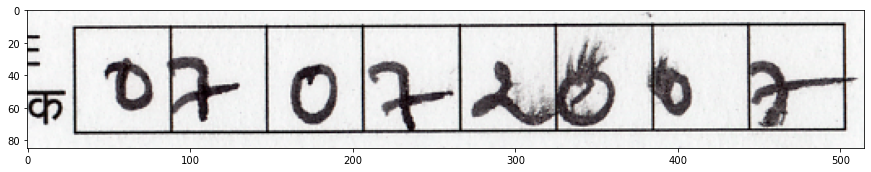

In [58]:
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
y=75
x=1780
h=85
w=515
legal_amount = ExtractAmount(imageTest,x,y,w,h)
imshow(legal_amount)
cv2.imwrite('PreprocessingFinal/legal_amount.png', legal_amount)

In [59]:
for i in range(0,len(checks_path)):
    image = cv2.imread(checks_path[i])
    image = cv2.fastNlMeansDenoisingColored(image,None,10,10,7,21)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh, image_black = cv2.threshold(gray_image, 170, 255, cv2.THRESH_BINARY)
    nv_image=remove_noise(image_black)
    img = ExtractAmount(nv_image,x,y,w,h)
    img = erode(img)
    #img = cv2.imread(amounts_path[i])
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(img, 5)
    adapt_type = cv2.ADAPTIVE_THRESH_GAUSSIAN_C
    thresh_type = cv2.THRESH_BINARY_INV
    bin_img = cv2.adaptiveThreshold(blur, 255, adapt_type, thresh_type, 11, 2)
    rho, theta, thresh = 2, np.pi/180, 400
    lines = cv2.HoughLines(bin_img, rho, theta, thresh)
    if lines is None:
        cv2.imwrite('PreprocessingFinal/date/'+checks_path[i][-17:]+'.png',seg(img))
    elif lines[0][0][0] > 125.0 or lines[0][0][0] < 20.0:
        for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)
    else:
        for rho,theta in lines[0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1600*(-b))
            y1 = int(y0 + 1600*(a))
            x2 = int(x0 - 1600*(-b))
            y2 = int(y0 - 1600*(a))
            cv2.line(img,(x1,y1),(x2,y2),(255,255, 255),10)  
    cv2.imwrite('PreprocessingFinal/date/'+checks_path[i][-17:]+'.png',seg(img))    

In [37]:
currentWorkingDir = os.path.dirname(os.getcwd())
print(currentWorkingDir)
currentWorkingDir = os.path.join(currentWorkingDir, "PI/PreprocessingFinal/date")
print(currentWorkingDir)
for dirname, _, filenames in os.walk(currentWorkingDir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/mehdi/Bureau
/home/mehdi/Bureau/PI/PreprocessingFinal/date
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309105.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 083659.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309151.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309099.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309079.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309091.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309084.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309074.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309127.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309115.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 120620.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309090.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309135.tif.png
/home/mehdi/Bureau/PI/PreprocessingFinal/date/Chequ

In [38]:
dataset_path = currentWorkingDir
checks_path = os.path.join(dataset_path,'*')
checks_path = glob.glob(checks_path)
print(checks_path)

['/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309105.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 083659.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309151.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309099.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309079.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309091.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309084.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309074.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309127.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309115.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 120620.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309090.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309135.tif.png', '/home/mehdi/Bureau/PI/PreprocessingFinal/date/Cheque 309106.tif.png', '/hom

In [39]:
def calculat(imagePath):
    img = cv2.imread(imagePath)
    number_of_black_pix = np.sum (img == 0)
    return number_of_black_pix

In [26]:
def calculat(imagePath):
    img = cv2.imread(imagePath)
    number_of_black_pix = np.sum (img == 0)
    if(number_of_black_pix>17000):
        print("cheque valide")
    else:
        print("vide")

In [43]:
x=0
tab = []
for i in range(0,len(checks_path)):
    #print ("Cheque num",i,calculat(checks_path[i]))
    tab.append(calculat(checks_path[i]))
min(tab)

5760